# MubFranckShir Mini Project | Reinforcement Learning 

#### Acknowledgements

This Jupyter a adaptation of a computer lab provided by $@IrisProff$ in the context of the module **Fundation Neurosciences & Cognitive Modelling** at the **UvA** (Universiteit of Amsterdam) directed by Jelle Zuidema. **Here I would like to say that "if we're bullshiting it'q on our own and not Jelle and Iris fault"** 

**Litterature**: 
  - Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: an introduction. Cambridge, MA: The MIT Press.
  - Gläscher, J., Daw, N., Dayan, P., & Odoherty, J. P. (2010). States versus Rewards: Dissociable Neural Prediction Error Signals Underlying Model-Based and Model-Free Reinforcement Learning. Neuron, 66(4), 585–595. doi: 10.1016/j.neuron.2010.04.016

## Introduction

This lab will guide you through a reinforcement learning simulation using two kinds of models **Model-Free** and **Model-Based**. Here, we simulate an agent navigating through the maze depicted below. You can see the initial position of the agent indicated by the red dot ($s_1$). The green boxes with stars in it are terminal states (values inside the star indicate the reward value). 

In our simulation, each position in the maze is a possible state, thus there are 16 states. We will index those line by line, such that the upper left corner is state 0 and the lower right corner is state 15. Hence, state 1 and state 11 are terminal states. There are four possible action directions, left (0), up (1), right (2) and down (3). Performing an action from a state is only possible if there is no border in the way.
![title](./maze.jpg)
We assume that the setup of the maze is unknown to the agent. 



## What are we aiming for?

In the previous session we considered two kind of model, Model-Free and Model-Based. In the following session we will present the original agent stuided in our computer lab then, focus on our own version the Model-Based agent.

For the first part we will implement a simple Q-learning algorithm to model how the agent learns which path to take in the maze. Then we will implement an other layer to this learning.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
alpha  = 0.01  # 0.1   # learning rate, 0 < alpha < 1
gamma  = 0.5   # 0.5   # temporal discount factor, 0 <= gamma <=1
tau    = 0.2   # 0.2   # temperature of softmax action selection, tau > 0
trials = 100   # number of times the agent has to solve the maze

### Updating the Q-values

As the agent navigates through the maze, it builds up an estimation of the utility of each state-action pair. This estimation is represented in a 16x4 matrix Q. Each time the agent takes a step, the Q-value of the corresponding state-action pair is updated. Specifically, when moving from state $s$ to state $s'$ with action $a$ and obtaining reward $R$, $Q(s,a)$ is updated according to:

\begin{align*}
    Q_{t+1}(s,a)=Q_t(s,a)+\alpha*\delta
\end{align*}

where $\delta$ is the prediction error, defined by:

\begin{align*}
   \delta = R + \gamma * max_{a'}(Q(s',a'))-Q(s,a)
\end{align*}

  - $\alpha$ is the learning rate
  - $\gamma$ is the temporal discount factor
  - $max_{a'}(Q(s',a'))$ refers to the highest Q-value of state 
  - $s'$. $Q(s,a)$ is updated proportionally to the size of the prediction error - the greater the prediction error, the more the agent learns.


In [2]:
def update_Q(a,s,s1,R,Q, gamma, alpha):
    """
    Function to update Q values.
    
    Input:
      a -- action (integer between 0 and 3) <-- The 4 possible mvt
      s -- state (integer between 0 and 15)
      s1 -- new state (integer between 0 and 15)
      R -- reward value
      Q -- (16, 4) array with Q-values for each (s, a) pair
      gamma -- temporal discount value
      alpha -- learning rate
      
    Output:
      Q[s, a] -- updated Q value
      pred_error -- prediction error (delta)
    """
    
    ### YOUR CODE HERE
    
    # compute prediction error
    pred_error = R + gamma * np.nanmax(Q[s1,:]) - Q[s, a]
    
    # update Q value
    Q[s,a] += alpha * pred_error     
    
    ###
    
    return Q[s,a], pred_error

### Softmax action selection

The second component of our Q-learning algorithm is an action selection function, that receives the Q-values of the current state as an input and returns an action to be taken. We will implement a softmax action selection function, that assigns probabilities to each action $a_i$ of a given state $s$, depending on its Q-value $q_i$:

\begin{align*}
    P(q_i|s) = \frac{e^{\frac{q_i}{\tau}}}{\sum_A{e^{\frac{q_i}{\tau}}}}
\end{align*}

Here, $\tau > 0$ is the so called temperature parameter. If $\tau$ is close to $0$, the algorithm most likely selects the action with the highest Q-value (i.e. it makes a *greedy* choice). For $\tau \rightarrow \infty$, the algorithm *randomly* selects one of the actions, irrespective of their Q-value. The softmax function is implemented in the cell below.

In [3]:
def softmax_act_select(Q, tau):
    """
    Softmax function for action selection.
    
    Input:
      Q -- (16, 4) array with Q-values for each (s, a) pair
      tau -- temperature parameter
    """
    
    Qs = Q[~np.isnan(Q)] # get valid actions
    actions =np.where(~np.isnan(Q)) # get valid action indices
    actions = actions[0]
    
    # compute probabliities for each action
    x = np.zeros(Qs.size); p = np.zeros(Qs.size);

    for i in range(Qs.size):
        x[i] = np.exp(Qs[i]/tau)/sum(np.exp(Qs)/tau)

    p = x/sum(x)
    
    # choose action
    a = np.random.choice(actions, p = p)
    
    return a

### Running the simulation  ||| Has to be adapted (the text)

Now we are ready to run the simulation. The code below sets values for our model parameter and implements the maze structure. Then it runs the simulation. Our agent has to solve the maze 100 times (you can change this number). In each trial, it starts in the initial state and can move freely around in the maze until it reaches one of the terminal states. 

We store the number of steps the agent takes in each trial, the Q-values after each trial, the prediction errors and visited state of each step and which terminal state was reached in each trial. These results are plotted in the lower cell.

#### Here we plot: "Steps in function of trials" 


↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 

Do you want to plot of the simulation separetly? (Yes) or not (nope)Yes


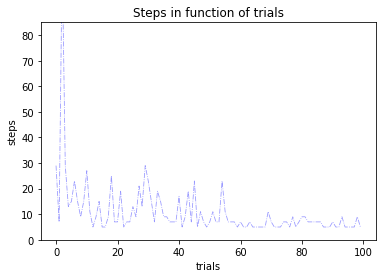

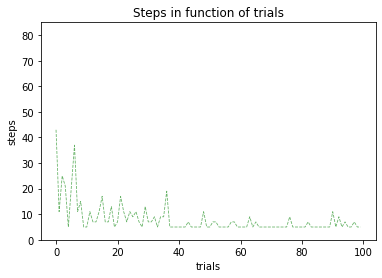

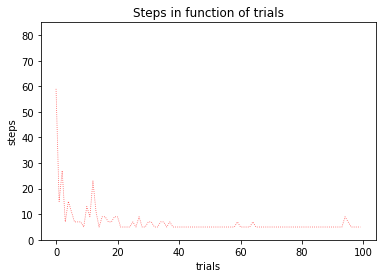

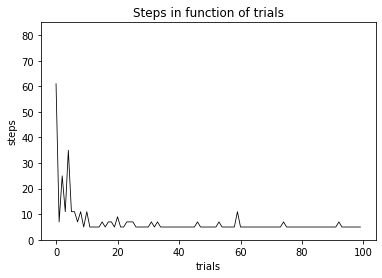

In [12]:
def toutout (n, color, alpha, gamma, tau, trials):
   
    # ClusterProblem
    next_s = float()
    next_a = float()
    R_tmp = float()
    ultimate_memory = list()

    ### implement maze structure
    # initialize Q(s,a)
    Q = np.zeros ([16,4])
    Q.fill(np.nan)  # array of nans
    # Create the matrix M
    Mr = np.copy(Q) # This is for the Reward
    Ms = np.copy(Q) # This is for the STATE


    # zeros for each possible action
    Q[0,2] = 0; Q[0,3] = 0; Q[1,0] = 0; Q[2,2] = 0; Q[2,3] = 0; Q[3,0] = 0
    Q[4,1] = 0; Q[4,3] = 0; Q[5,2] = 0; Q[6,0] = 0; Q[6,1] = 0; Q[6,2] = 0; Q[6,3] = 0; Q[7,0] = 0; Q[7,3] = 0
    Q[8,1] = 0; Q[8,2] = 0; Q[8,3] = 0; Q[9,0] = 0; Q[9,2] = 0; Q[10,0] = 0; Q[10,1] = 0; Q[10,3]= 0; Q[11,0]=0
    Q[12,1] = 0; Q[12,2] = 0; Q[13,0] = 0; Q[14,1] = 0; Q[14,2] = 0; Q[15,0] = 0

    # terminal and initial states
    s_term = [1,11]
    s_init = 13

    # rewards
    Rs = np.zeros ([16,1])
    Rs[1] = 5; Rs[11] = 5

    ### initialize variables to store data 
    steps = np.zeros([trials,1])
    s_term_meta = np.zeros([trials,1])
    Q_meta = np.zeros([trials,16,4])
    pred_error_meta = [];
    visited_states = []

    states = np.arange(16).reshape(4,4)

    ### run simulation
    for trial in range(trials):

        # place agent in initial state
        s = s_init

        # store initial state
        visited_states.append([s_init])

        # store Q values
        Q_meta[trial,:,:] = Q
        # continue until in terminal state
        while not(s in s_term):

            # print(s)
            # choose action
            a = softmax_act_select(Q[s], tau)

            # observe new state
            # left
            if a == 0:
                s1 = s-1
            # up
            elif a == 1:
                s1= s-4
            # right
            elif a == 2:
                s1 = s+1
            # down
            else:
                s1 = s+4

            # observe R
          #  print("\n----We are in state: ", s, "\ndoing mvt : ", a, "\nAnd going to state: ", s1, "\n---------\n\n\n")
            R = Rs[s1]

            # update Q
            Q[s,a], pred_error = update_Q(a,s,s1,R,Q, gamma, alpha)

            # update M(s, a)
            Mr[s, a]= R
            Ms[s, a]= s1
           # print("----\n This is R: ", R, "\n This is S1: ", s1, "\n\n------" )
          #  print('new paire : ', [s, a])

            if [s, a] not in ultimate_memory:
                ultimate_memory.append([s, a])

            # update state
            s = s1

            # count steps
            steps[trial] += 1

            # store prediction error 
            pred_error_meta.append(pred_error)

            # store visited state
            visited_states[trial].append(s1)

            for i in range(n):
                nextt = random.choice(ultimate_memory)
                next_s = nextt[0]
                next_a = nextt[1]

                # S(t)imulate new state
                # left
                if next_a == 0:
                    next_s1 = next_s-1
                # up
                elif next_a == 1:
                    next_s1= next_s-4
                # right
                elif next_a == 2:
                    next_s1 = next_s+1
                # down
                else:
                    next_s1 = next_s+4

                # observe R
                R = Rs[next_s1]

                # update Q
                Q[next_s,next_a], pred_error = update_Q(next_a,next_s,next_s1,R,Q, gamma, alpha)

        # store terminal state
        s_term_meta[trial] = s1  
    
    new_steps = list()
    for i in steps:
        new_steps.extend(i)
   
    new_steps = list()

    return steps

to_plot = list()
n_value = [5, 10, 20, 50]
color = ['b', 'g', 'r', 'black']
line_tex = ['-.', '--', ':', 'solid']
alpha_p = [0.4, 0.6, 0.7, 1]
n_value = [5, 10, 20, 50]
to_plot = list()
da_name = str()

for n in range(len(n_value)) :
    to_plot.append(toutout(n_value[n], color[n], alpha, gamma, tau, trials))

if input('Do you want to plot of the simulation separetly? (Yes) or not (nope) :\n\n\t') in 'YesYESyes':
    for i in range(len(n_value)):
        fig, axes = plt.subplots()    
        plt.plot(to_plot[i],color[i], alpha=alpha_p[i], linewidth=0.8, linestyle=line_tex[i])
        plt.title('Steps in function of trials')
        plt.xlabel('trials')
        plt.ylabel('steps')
        plt.ylim(0, 85)
        da_name = str(str(i)+'steps_.pdf')
        plt.savefig(da_name, format='pdf')
  #  plt.clf()
else:
    for i in range(len(n_value)): 
        plt.plot(to_plot[i],color[i], alpha=alpha_p[i], linewidth=0.8, linestyle=line_tex[i])
        plt.title('Steps in function of trials')
        plt.xlabel('trials')
        plt.ylabel('steps')
        plt.ylim(0, 85)
        da_name = str(str(i)+'steps_.pdf')
        plt.savefig(da_name, format='pdf')
  #  plt.clf()

# plt.savefig('steps_.pdf', format='pdf')

#### Here we plot: "Prediction error in function of trials" 


↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 

Do you want to plot of the simulation separetly? (Yes) or not (nope) :

	Yes


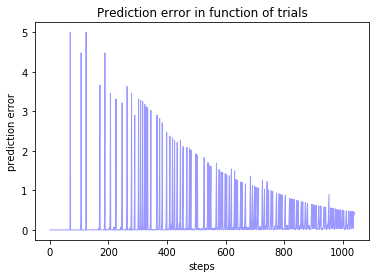

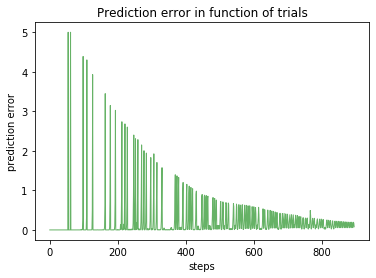

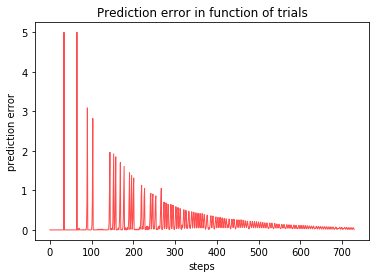

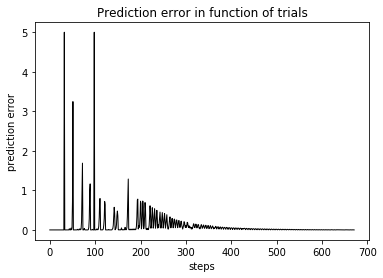

In [14]:
def toutout (n, color, alpha, gamma, tau, trials):

    # ClusterProblem
    next_s = float()
    next_a = float()
    R_tmp = float()
    ultimate_memory = list()

    ### implement maze structure
    # initialize Q(s,a)
    Q = np.zeros ([16,4])
    Q.fill(np.nan)  # array of nans
    # Create the matrix M
    Mr = np.copy(Q) # This is for the Reward
    Ms = np.copy(Q) # This is for the STATE


    # zeros for each possible action
    Q[0,2] = 0; Q[0,3] = 0; Q[1,0] = 0; Q[2,2] = 0; Q[2,3] = 0; Q[3,0] = 0
    Q[4,1] = 0; Q[4,3] = 0; Q[5,2] = 0; Q[6,0] = 0; Q[6,1] = 0; Q[6,2] = 0; Q[6,3] = 0; Q[7,0] = 0; Q[7,3] = 0
    Q[8,1] = 0; Q[8,2] = 0; Q[8,3] = 0; Q[9,0] = 0; Q[9,2] = 0; Q[10,0] = 0; Q[10,1] = 0; Q[10,3]= 0; Q[11,0]=0
    Q[12,1] = 0; Q[12,2] = 0; Q[13,0] = 0; Q[14,1] = 0; Q[14,2] = 0; Q[15,0] = 0

    # terminal and initial states
    s_term = [1,11]
    s_init = 13

    # rewards
    Rs = np.zeros ([16,1])
    Rs[1] = 5; Rs[11] = 5

    ### initialize variables to store data 
    steps = np.zeros([trials,1])
    s_term_meta = np.zeros([trials,1])
    Q_meta = np.zeros([trials,16,4])
    pred_error_meta = [];
    visited_states = []

    states = np.arange(16).reshape(4,4)

    ### run simulation
    for trial in range(trials):

        # place agent in initial state
        s = s_init

        # store initial state
        visited_states.append([s_init])

        # store Q values
        Q_meta[trial,:,:] = Q
        # continue until in terminal state
        while not(s in s_term):

            # print(s)
            # choose action
            a = softmax_act_select(Q[s], tau)

            # observe new state
            # left
            if a == 0:
                s1 = s-1
            # up
            elif a == 1:
                s1= s-4
            # right
            elif a == 2:
                s1 = s+1
            # down
            else:
                s1 = s+4

            # observe R
          #  print("\n----We are in state: ", s, "\ndoing mvt : ", a, "\nAnd going to state: ", s1, "\n---------\n\n\n")
            R = Rs[s1]

            # update Q
            Q[s,a], pred_error = update_Q(a,s,s1,R,Q, gamma, alpha)

            # update M(s, a)
            Mr[s, a]= R
            Ms[s, a]= s1
           # print("----\n This is R: ", R, "\n This is S1: ", s1, "\n\n------" )
          #  print('new paire : ', [s, a])

            if [s, a] not in ultimate_memory:
                ultimate_memory.append([s, a])

            # update state
            s = s1

            # count steps
            steps[trial] += 1

            # store prediction error 
            pred_error_meta.append(pred_error)

            # store visited state
            visited_states[trial].append(s1)

            for i in range(n):
                nextt = random.choice(ultimate_memory)
                next_s = nextt[0]
                next_a = nextt[1]

                # S(t)imulate new state
                # left
                if next_a == 0:
                    next_s1 = next_s-1
                # up
                elif next_a == 1:
                    next_s1= next_s-4
                # right
                elif next_a == 2:
                    next_s1 = next_s+1
                # down
                else:
                    next_s1 = next_s+4

                # observe R
                R = Rs[next_s1]

                # update Q
                Q[next_s,next_a], pred_error = update_Q(next_a,next_s,next_s1,R,Q, gamma, alpha)

        # store terminal state
        s_term_meta[trial] = s1  

    return pred_error_meta

to_plot   = list()
to_plot   = list()
n_value   = [5, 10, 20, 50]
color     = ['b', 'g', 'r', 'black']
line_tex  = ['-.', '--', ':', 'solid']
alpha_p   = [0.4, 0.6, 0.7, 1]
n_value   = [5, 10, 20, 50]
line_siz  = [1, 1, 1, 1]
to_plot   = list()
da_name   = str()

for n in range(len(n_value)) :
    to_plot.append(toutout(n_value[n], color[n], alpha, gamma, tau, trials))

if input('Do you want to plot of the simulation separetly? (Yes) or not (nope) :\n\n\t') in 'YesYESyes':
    for i in range(len(n_value)):    
        fig, axes = plt.subplots()  
        plt.title('Prediction error in function of trials')
        plt.plot(to_plot[i],color[i], alpha=alpha_p[i], linewidth=line_siz[i])
        plt.xlabel('steps')
        plt.ylabel('prediction error')
 #       da_name = str(str(i)+'predErr_.pdf')
#        plt.savefig(da_name, format='pdf')
   #     plt.clf()
    
else:
    for i in range(len(n_value)):    # plot predition error
        plt.title('Prediction error in function of trials')
        plt.plot(to_plot[i],color[i], alpha=alpha_p[i], linewidth=line_siz[i])
        plt.xlabel('steps')
        plt.ylabel('prediction error')
      #  da_name = str(str(i)+'predErr_.pdf')
      #  plt.savefig(da_name, format='pdf')
      #  plt.clf()
# plt.savefig('steps_.pdf', format='pdf')